In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                     Close             \
Symbols          AAPL        NKE      GOOGL     AMZN       AAPL        NKE   
Date                                                                         
2015-01-02  24.644020  43.770931  26.477501  15.4260  27.332500  47.514999   
2015-01-05  23.949755  43.066208  25.973000  15.1095  26.562500  46.750000   
2015-01-06  23.952011  42.812878  25.332001  14.7645  26.565001  46.474998   
2015-01-07  24.287867  43.697227  25.257500  14.9210  26.937500  47.435001   
2015-01-08  25.221066  44.705948  25.345501  15.0230  27.972500  48.529999   

Attributes                           High             ...        Low           \
Symbols         GOOGL     AMZN       AAPL        NKE  ...      GOOGL     AMZN   
Date                                                  ...                       
2015-01-02  26.477501  15.4260  27.860001  48.474998  ...  26.393999  15.3480   
2015-01-05  25.973000  15.1095  27.162500  47.275002  ...  25.887501  15.0425   
2015-01-06  25.332001  14.7645  26.857500  47.075001  ...  25.277500  14.6190   
2015-01-07  25.257500  14.9210  27.049999  47.650002  ...  25.182501  14.7665   
2015-01-08  25.345501  15.0230  28.037500  48.549999  ...  24.750999  14.8055   

Attributes       Open                                      Volume             \
Symbols          AAPL        NKE      GOOGL     AMZN         AAPL        NKE   
Date                                                                           
2015-01-02  27.847500  48.275002  26.629999  15.6290  212818400.0  4985800.0   
2015-01-05  27.072500  47.255001  26.357500  15.3505  257142000.0  6889200.0   
2015-01-06  26.635000  46.945000  26.025000  15.1120  263188400.0  7576000.0   
2015-01-07  26.799999  46.805000  25.547501  14.8750  160423600.0  7256000.0   
2015-01-08  27.307501  47.830002  25.075500  15.0160  237458000.0  5978200.0   

Attributes                          
Symbols          GOOGL        AMZN  
Date                                
2015-01-02  26480000.0  55664000.0  
2015-01-05  41182000.0  55484000.0  
2015-01-06  54456000.0  70380000.0  
2015-01-07  46918000.0  52806000.0  
2015-01-08  73054000.0  61768000.0  

[5 rows x 24 columns]

In [3]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.644020,43.770931,26.477501,15.4260
2015-01-05,23.949755,43.066208,25.973000,15.1095
2015-01-06,23.952011,42.812878,25.332001,14.7645
2015-01-07,24.287867,43.697227,25.257500,14.9210
2015-01-08,25.221066,44.705948,25.345501,15.0230


In [4]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360910,0.524817,0.496610
NKE,0.360910,1.000000,0.387434,0.341530
GOOGL,0.524817,0.387434,1.000000,0.647942
AMZN,0.496610,0.341530,0.647942,1.000000


In [6]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079366449627853

In [7]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [8]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.2054901570557065

In [9]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [10]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


In [11]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000


In [12]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [13]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [14]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.239937,0.188222,0.374919,0.355573,0.234933,0.034576
1,0.287384,0.201473,0.601134,0.225150,0.126421,0.047295
2,0.238611,0.199134,0.195190,0.212041,0.297122,0.295647
3,0.243702,0.194323,0.220680,0.334729,0.156175,0.288416
4,0.237096,0.199220,0.345189,0.110525,0.474153,0.070133


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

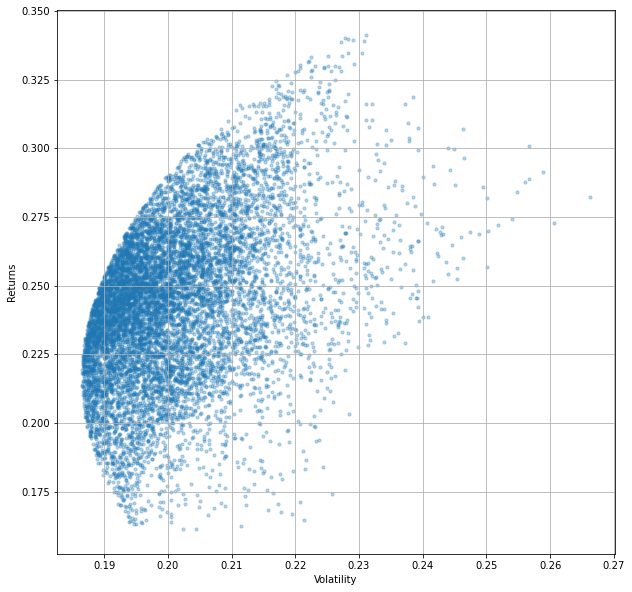

In [15]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


In [16]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.219240
Volatility      0.186565
AAPL weight     0.256745
NKE weight      0.397316
GOOGL weight    0.287588
AMZN weight     0.058351
Name: 4907, dtype: float64

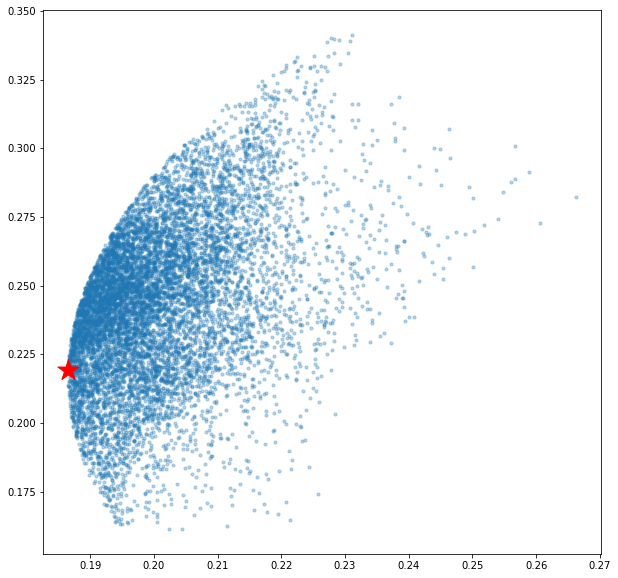

In [17]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [18]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.333333
Volatility      0.222392
AAPL weight     0.760817
NKE weight      0.083005
GOOGL weight    0.008755
AMZN weight     0.147424
Name: 2421, dtype: float64

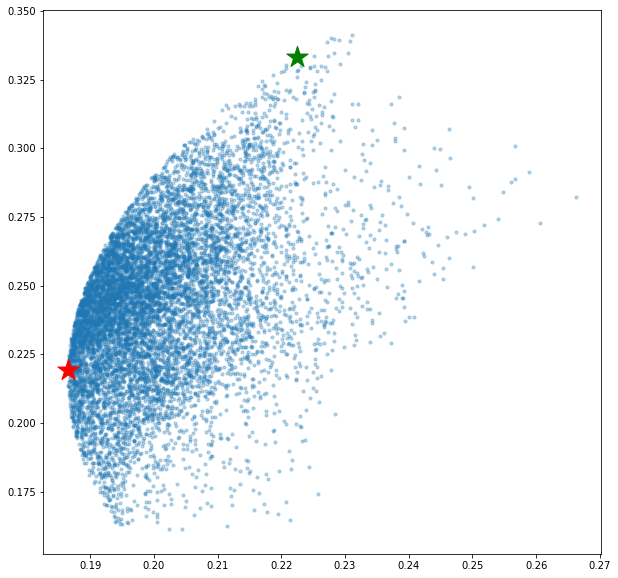

In [19]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)